In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas_profiling as pp
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data/train_clean.csv', index_col=0)
data.head()

,SalePrice,GrLivArea,2ndFlrSF,OverallQual,MasVnrArea,GarageCars,GarageArea,ExterQual,KitchenQual,BsmtQual,...,Foundation_PConc,GarageType_Attchd,GarageType_Detchd,MSSubClass_60,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Neighborhood_CollgCr,Neighborhood_NAmes,CentralAir_Y,isBsmtFinType1
Id,,,,,,,,,,,,,,,,,,,,,
1,208500,1710,854,7,196.0,2,548,4,4,4,...,1,1,0,1,0,0,1,0,1,1
2,181500,1262,0,6,0.0,2,460,3,3,4,...,0,1,0,0,0,0,0,0,1,1
3,223500,1786,866,7,162.0,2,608,4,4,4,...,1,1,0,1,0,0,1,0,1,1
4,140000,1717,756,7,0.0,3,642,3,4,3,...,0,0,1,0,0,1,0,0,1,1
5,250000,2198,1053,8,350.0,3,836,4,4,4,...,1,1,0,1,0,0,0,0,1,1


In [3]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "min_samples_split": range(2, 8),
    "max_features": ["auto", "sqrt", "log2"],
}

regressor = RandomForestRegressor()

grid = GridSearchCV(regressor, param_grid, cv=5, verbose=1)
grid.fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.6min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 8),
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [5]:
grid.best_params_, grid.best_score_

({'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50},
 0.8678462534905844)

In [6]:
regressor = RandomForestRegressor(**grid.best_params_)

regressor.fit(X_train, y_train)
r2_score(y_test, regressor.predict(X_test))

0.8475683487642418

In [7]:
regressor.feature_importances_

array([1.16881111e-01, 3.23711497e-02, 1.42533096e-01, 1.65446011e-02,
       7.17016132e-02, 6.16055373e-02, 4.36453840e-02, 3.56568503e-02,
       5.38316054e-02, 1.64587247e-02, 6.07765217e-02, 3.09966141e-02,
       5.75655221e-02, 9.37851326e-03, 8.33453207e-03, 2.48469981e-02,
       4.75511151e-02, 2.91055928e-02, 1.00982672e-02, 1.43571831e-02,
       1.23788242e-04, 8.49178200e-03, 3.82583333e-03, 8.23810626e-03,
       6.31144352e-03, 5.58079145e-03, 1.39486675e-02, 7.34319092e-03,
       2.17196886e-03, 2.85518097e-03, 6.10592773e-04, 3.46126477e-03,
       2.23036131e-03, 1.20720757e-03, 2.15105363e-03, 2.00980661e-03,
       5.57855003e-04, 1.43268958e-03, 1.14693833e-03, 8.69100899e-04,
       1.62197469e-03, 3.09308632e-03, 1.62744468e-02, 5.80433621e-03,
       1.89563445e-03, 4.72543660e-03, 2.15589522e-03, 5.08120181e-04,
       1.11327441e-03, 7.45610211e-04, 2.96945544e-03, 2.84573943e-04])

/home/kmb/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


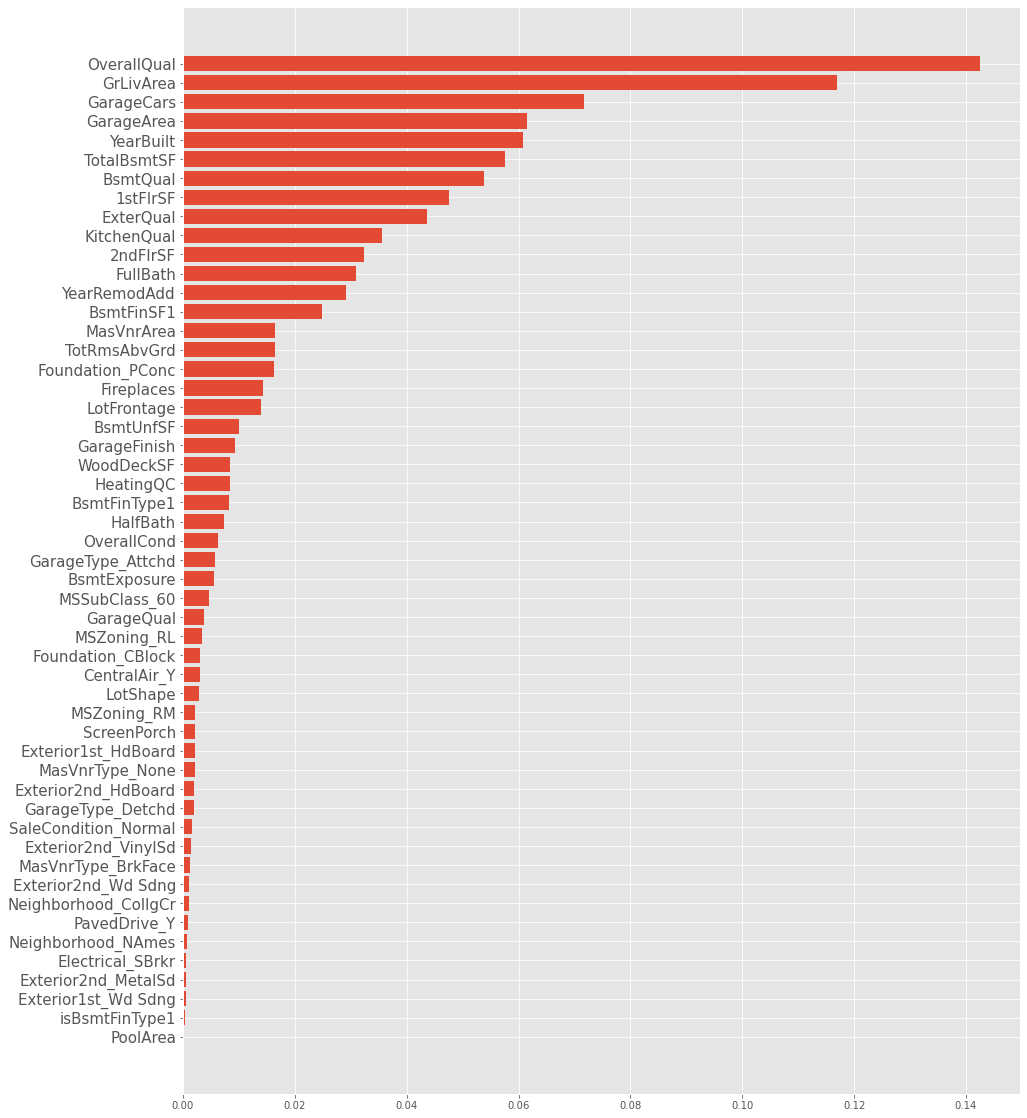

In [8]:
sort_indices = np.argsort(regressor.feature_importances_)
feature_importances = regressor.feature_importances_[sort_indices]
feature_names = X.columns[sort_indices]

fig, ax = plt.subplots(figsize=(15, 20), facecolor='w')
ax.barh(np.arange(len(feature_importances)), feature_importances)
ax.set_yticks(np.arange(len(feature_importances)))
ax.set_yticklabels(feature_names, fontSize=15);

## Automated pipelines
- wrap each preprocessing step in function (automate)
- add information about types of data in JSON file 
- add information about additional parameters (e.g. nan imputing strategy) in another JSON file

## How to improve models?
- detect and remove outlier observations (Krzysiek)
- different encoding of ordinal features (binning, embedding)
- different threshold for null excluded features and uncorrelated features

## Automatically run different models
- use scikitlearn pipelines to chain train-test splitting, model fitting, grid search, etc.

## Useful links
- https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html